# 정규표현식과 단어사전 개발

# 1.한글 형태소 분석

자연어 처리부분에 있어서 한국어 전처리 도전요소 : 한글 형태소 분석기로 어느정도 해소

* 영어권의 자연어 연구는 한글보다 많이 진보(nltk 라이브러리)
* 영어와 다른 한글의 특성은 자연어 처리의 또 다른 도전요소
  - 한글 맞춤법과 띄어쓰기 문제
  - 어순이 중요하지 않고 주어가 없어도 말이 통함 : 학교에 갑니다. 나는 갑니다 학교에.
  - 한글은 교착어 : 영어의 형태소 식별과 차이, 학교에서 학교를 학교에 학교는 학교가 … 등


* 처리가 곤란한 예) 국제사회와우리의노력들로범죄를척결하자 앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ 와하하하하하하하하하핫

## 가. 한글 형태소분석기 설치

In [ ]:
# 한글형태소 분석기 + Mecab 설치 : 2분 정도 소요
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4 MB 126 kB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 448 kB 64.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/l

In [ ]:
text = '홍길동 전화번호는 Kt 1234-5678번 입니까?'

In [ ]:
# 한글 형태소분석기 클래스 불러오기, 형태소 tag 출력 (pos)
from konlpy.tag import Hannanum, Komoran, Kkma, Okt, Mecab

komoran = Komoran()
print(komoran.pos(text)) #pos = part of speech / 형태소 태그를 붙여 튜플의 형태로 출력해줌

okt = Okt()
print(okt.pos(text))

mecab = Mecab()
print(mecab.pos(text))

[('홍길동', 'NNP'), ('전화번호', 'NNP'), ('는', 'JX'), ('Kt', 'SL'), ('1234', 'SN'), ('-', 'SW'), ('5678', 'SN'), ('번', 'NNB'), ('입', 'VV'), ('니까', 'EF'), ('?', 'SF')]
[('홍길동', 'Noun'), ('전화번호', 'Noun'), ('는', 'Josa'), ('Kt', 'Alpha'), ('1234-5678', 'Number'), ('번', 'Noun'), ('입', 'Noun'), ('니까', 'Josa'), ('?', 'Punctuation')]
[('홍길동', 'NNG'), ('전화', 'NNG'), ('번호', 'NNG'), ('는', 'JX'), ('Kt', 'SL'), ('1234', 'SN'), ('-', 'SY'), ('5678', 'SN'), ('번', 'NNBC'), ('입니까', 'VCP+EF'), ('?', 'SF')]


In [ ]:
# tagset 보기
print(okt.tagset)

{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}


In [ ]:
# 형태소 분석(의미를 가지는 최소 단위)
print(komoran.morphs(text))
print(okt.morphs(text))
print(mecab.morphs(text))

['홍길동', '전화번호', '는', 'Kt', '1234', '-', '5678', '번', '입', '니까', '?']
['홍길동', '전화번호', '는', 'Kt', '1234-5678', '번', '입', '니까', '?']
['홍길동', '전화', '번호', '는', 'Kt', '1234', '-', '5678', '번', '입니까', '?']


In [ ]:
# 명사만 추출
print(komoran.nouns(text))
print(okt.nouns(text))
print(mecab.nouns(text))

['홍길동', '전화번호', '번']
['홍길동', '전화번호', '번', '입']
['홍길동', '전화', '번호', '번']


##  나. 텍스트 예제 데이터 

In [ ]:
# 대한민국 헌법과 법률 text 가져오기
from konlpy.corpus import kolaw, kobill   
print(kolaw.fileids(), kobill.fileids())

['constitution.txt'] ['1809898.txt', '1809893.txt', '1809899.txt', '1809894.txt', '1809890.txt', '1809892.txt', '1809891.txt', '1809897.txt', '1809896.txt', '1809895.txt']


In [ ]:
#헌법전문을 읽어들이고 문장별로 분리해서 리스트로 정리 
con_para = kolaw.open('constitution.txt').read() 
# print(con_para)
sentences = con_para.split('\n\n') #split() 괄호안에 들어가는 문자를 기준으로 읽고 결과값을 리턴해줌
sentences

['대한민국헌법',
 '유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.',
 '       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 

## 다.한글 뛰어쓰기

Py-Hanspell : 네이버 한글 맞춤법 검사기, 참조 : https://github.com/ssut/py-hanspell

In [ ]:
# 한글 맞춤법 라이브러리 설치
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-h5cmwxbt
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-h5cmwxbt
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=5fd2f82ee631d31f38273548916a2fda18bcfb8a3bbb0c90075a4710b8bdb2c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-wdutn1kr/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
import hanspell
hanspell.__version__

'1.1'

In [ ]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)
hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [ ]:
sent = '''김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는
결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.'''

In [ ]:
spelled_sent = spell_checker.check(sent)
hanspell_sent = spelled_sent.checked
print(hanspell_sent)

김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.


In [ ]:
# 한글 형태소 분석기(Mecab 등)로도 뛰어쓰기나 맞춤법 문제는 해결됨
print(mecab.morphs(sent))

['김철수', '는', '극', '중', '두', '인격', '의', '사나이', '이광수', '역', '을', '맡', '았', '다', '.', '철수', '는', '한국', '유일', '의', '태권', '도', '전승자', '를', '가리', '는', '결전', '의', '날', '을', '앞두', '고', '10', '년', '간', '함께', '훈련', '한', '사형', '인유', '연재', '(', '김광', '수분', ')', '를', '찾', '으러', '속세', '로', '내려온', '인물', '이', '다', '.']


# 2.정규표현식과 정규화

정규식 연산 re(Regular expression operations) 라이브러리 참조 : https://python.flowdas.com/library/re.html

정제(cleaning) : 갖고 있는 코퍼스로부터 노이즈 데이터를 제거

정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어주는 과정

re.sub（정규 표현식, 대상 문자열 , 치환 문자）

- 정규 표현식 - 검색 패턴을 지정
- 대상 문자열 - 검색 대상이 되는 문자열
- 치환 문자 - 변경하고 싶은 문자

정규표현식 문법 참조 : https://wikidocs.net/21703

## 가.정규표현식 활용 

In [ ]:
a = 'abcdef\n'  # \t tab, \n newline #utf-8로 읽어들임
print(a)
b = r'abcdef\n' #bite로 읽어들임(\n을 문자로 받아들였어)
print(b)

abcdef

abcdef\n


In [ ]:
# 찾기 
import re
text = "에러 1122 : 레퍼런스 오류\n 에러 1033: 아규먼트 오류" # :스페이스가 있는 경우 없는 경우 다 찾아줌
regex = re.compile("에러\s\d+")  # 에러 + 스페이스 + 숫자 한개 이상인것 
mc = regex.findall(text)
print(mc)

['에러 1122', '에러 1033']


In [ ]:
# 숫자 찾기  
text = "문의사항이 있으면 032-232-3245 으로 연락주시기 바랍니다."
regex = re.compile('\d\d\d-\d\d\d-\d\d\d\d')
matchobj = regex.search(text)
phonenumber = matchobj.group()
print(phonenumber) 

032-232-3245


In [ ]:
help(re.sub)

Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the Match object and must return
    a replacement string to be used.



In [ ]:
print(re.sub(phonenumber,' ', text))

문의사항이 있으면   으로 연락주시기 바랍니다.


In [ ]:
# 일치되는 부분 - 리스트로 출력
text = 'ㅋㅋㅋ 안녕 하ㅏ세요'
print(re.compile(r'[ㄱ-ㅎ]+').findall(text))
print(re.compile(r'[ㄱ-ㅎ| ㅏ-ㅣ]+').findall(text))
print(re.compile('[가-핳]+').findall(text))
re.sub('[ㄱ-ㅎ]', '',text)

['ㅋㅋㅋ']
['ㅋㅋㅋ ', ' ', 'ㅏ']
['안녕', '하', '세요']


' 안녕 하ㅏ세요'

In [ ]:
# 일치되는 부분은 제외하고 추출 - string 데이터로 출력
print(re.compile('[가-핳]+').sub('',text))
print(re.compile(r'[ㄱ-ㅎ| ㅏ-ㅣ]+').sub('',text))

ㅋㅋㅋ  ㅏ
안녕하세요


In [ ]:
# 앞에 예제에서 문자만 출력, 특정단어 제거
sent = hanspell_sent #hanspell로 띄어쓰기 점검
print(hanspell_sent)
print(re.compile(r'[가-핳]+|[0-9]+').findall(hanspell_sent)) # 텍스트속 특수문자는 없애라
print("2",re.compile(r'[^가-핳]+').sub(' ', hanspell_sent))  # ^ 은 해당조건이 아닌것
print(re.sub('김철수', '', hanspell_sent))
list1 = re.compile('\w+|\w+\s').findall(sent) #특수문자 제거
print('3', list1)
text = " ".join(list1) # space(자신이 원하는 구분법)를 두고 합치면 형태소 단위로 나뉘어진 text를 받을 수 있다
print(text)


김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
['김철수는', '극', '중', '두', '인격의', '사나이', '이광수', '역을', '맡았다', '철수는', '한국', '유일의', '태권도', '전승자를', '가리는결전의', '날을', '앞두고', '10', '년간', '함께', '련한', '사', '인', '유연제', '김광수', '분', '를', '찾으러', '속세로', '내려온', '인물이다']
2 김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다 철수는 한국 유일의 태권도 전승자를 가리는결전의 날을 앞두고 년간 함께 련한 사 인 유연제 김광수 분 를 찾으러 속세로 내려온 인물이다 
는 극 중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제(김광수 분)를 찾으러 속세로 내려온 인물이다.
3 ['김철수는', '극', '중', '두', '인격의', '사나이', '이광수', '역을', '맡았다', '철수는', '한국', '유일의', '태권도', '전승자를', '가리는결전의', '날을', '앞두고', '10년간', '함께', '훈련한', '사형인', '유연제', '김광수', '분', '를', '찾으러', '속세로', '내려온', '인물이다']
김철수는 극 중 두 인격의 사나이 이광수 역을 맡았다 철수는 한국 유일의 태권도 전승자를 가리는결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연제 김광수 분 를 찾으러 속세로 내려온 인물이다


## 나.신조어나 반복되는 문자 정제 

특별한 목적에 맞는 라이브러리 활용

soynlp 라이브러리 활용 :  https://github.com/lovit/soynlp
pip3 install soynlp

In [ ]:
!pip install soynlp

     |████████████████████████████████| 416 kB 11.6 MB/s 


In [ ]:
# 반복되는 이모티콘 정제(주로 sns 내용 정제할 경우)
from soynlp.normalizer import emoticon_normalize, repeat_normalize
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


In [ ]:
# 반복되는 문자 정제
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


# 3.단어의 벡터화 표현

## 가.Word2Vec

* CBOW(Continuous Bag of Words) : 주변에 있는 단어로 중심단어를 예측 모델
* Skip-Gram : 중심 단어를 기준으로 어떤 주변단어가 존재하는지 예측
* one-hot, bow 단어의 순서(맥락)을 놓치고 원래의 한글 텍스트로 돌릴 수 없기 때문에 단어를 벡터화 하는 방법(차원을 하나 더 늘린다)으로 word2vec과 fast text에 대해서 배운다

In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f086bd571d0>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
# 리뷰 갯수와 데이터 형태 살펴보기
print(len(train_data))
train_data[-5:]

200000


,id,document,label
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0
199999,8548411,포풍저그가나가신다영차영차영차,0


In [ ]:
# NULL 값 존재 유무 확인, Null값 존재하는 행제거, 변경된 자료 갯수 
# dropna 결측값을 drop 시켜라
print(train_data.isnull().values.any()) # isnull().values.any()
train_data = train_data.dropna(how = 'any') #dropna 결측값을 drop시킴
print(train_data.isnull().values.any()) 
print(len(train_data)) 

False
False
199992


In [ ]:
# 정규 표현식을 통한 한글 외 문자 제거/ document만 관심있어
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[-5:] 

,id,document,label
199995,8963373,포켓 몬스터 짜가 ㅡㅡ,0
199996,3302770,쓰레기,0
199997,5458175,완전 사이코영화 마지막은 더욱더 이 영화의질을 떨어트린다,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0
199999,8548411,포풍저그가나가신다영차영차영차,0


In [ ]:
# 불용어 정의(의미가 없는 단어)
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
# 형태소 분석기 Mecab을 사용한 토큰화와 불용어 제거 (mecab 20초, okt 10분 이상 소요)
mecab = Mecab()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화/ 띄어쓰기가 제대로 안되어있기 때문에 1차 정리해줌
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [ ]:
tokenized_data[:10]

리뷰의 최대 길이 : 83
리뷰의 평균 길이 : 13.44726789071563


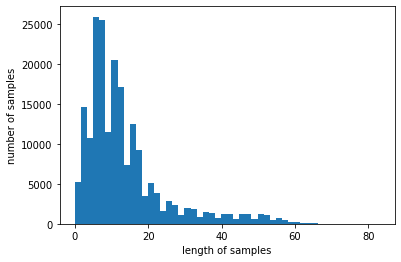

In [ ]:
# 리뷰 길이 분포 확인/ 우리가 분석한 데이터가 어느정도인지 시각화함
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
#단어벡터 차원수128, 주변단어 앞뒤 5개 토큰 관찰, CPU는 quad core사용,  sg =1 skip-gram, 0은 cbow(1분 소요)
from gensim.models import Word2Vec
model_1 = Word2Vec(sentences = tokenized_data, size = 128, window = 5, min_count = 5, workers = 4, sg = 1)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인/ 18140토큰이 있고 size=128이다
model_1.wv.vectors.shape

(18140, 128)

In [ ]:
model_1.wv.most_similar("최민식") #벡터화 시키면 유사성 비교가 가능하다

[('한석규', 0.7938042879104614),
 ('키아누리브스', 0.784090518951416),
 ('톰크루즈', 0.7829539775848389),
 ('채민서', 0.7805576324462891),
 ('이미숙', 0.7650290727615356),
 ('이병헌', 0.7624304294586182),
 ('공리', 0.7554012537002563),
 ('조재현', 0.7543052434921265),
 ('박용우', 0.7516981363296509),
 ('김창완', 0.7510155439376831)]

In [ ]:
model_1.wv.most_similar("히어로")

[('마블', 0.7493304014205933),
 ('슬래셔', 0.7387149333953857),
 ('물중', 0.7295476198196411),
 ('첩', 0.7260741591453552),
 ('액션물', 0.7043384909629822),
 ('러시아워', 0.7018414735794067),
 ('서유기', 0.6998911499977112),
 ('극화', 0.6977062225341797),
 ('코믹스', 0.6906441450119019),
 ('원탑', 0.6901664733886719)]

In [ ]:
model_1.wv.most_similar("송윤아")

[('유아인', 0.8964195251464844),
 ('황정음', 0.8809512257575989),
 ('엄지원', 0.8683137893676758),
 ('소희', 0.8624376058578491),
 ('김민희', 0.8601497411727905),
 ('김주혁', 0.8587899208068848),
 ('조안', 0.8584176301956177),
 ('김재원', 0.8582807779312134),
 ('문채원', 0.8575950264930725),
 ('주지훈', 0.857517421245575)]

In [ ]:
model_1.wv.most_similar(positive=['한국','미국'],negative=['서울'], topn=5) #topn은 몇개를 출력시킬 것이냐

[('일본', 0.6495769023895264),
 ('할리우드', 0.5650379657745361),
 ('중국', 0.5540763139724731),
 ('조폭', 0.5534427165985107),
 ('서양', 0.5448849201202393)]

## 나.FastText

subword를 이용한 벡터화 표현, 지정된 단어사전 크기로 개발

In [ ]:
# FastText 모듈 사용 벡터화(1분 소요)
from gensim.models import FastText
model = FastText(tokenized_data, size=128, window=5, min_count=5, workers=4, sg=1)

In [ ]:
model.wv.most_similar("최민식")

[('한석규', 0.8044363856315613),
 ('로버트드니로', 0.7930804491043091),
 ('크리스찬베일', 0.7757457494735718),
 ('크리스토프', 0.7669867277145386),
 ('채민서', 0.7619842290878296),
 ('김고은', 0.7611386179924011),
 ('최민수', 0.7592549324035645),
 ('신들린', 0.7529743909835815),
 ('매들린', 0.7520672082901001),
 ('파치노', 0.7495468854904175)]

In [ ]:
model.wv.most_similar(positive=['한국','미국'], negative=['서울'], topn=5)

[('일본', 0.6453016400337219),
 ('한국식', 0.6312634944915771),
 ('서양', 0.5935593247413635),
 ('조폭', 0.583681583404541),
 ('중국', 0.5805271863937378)]

In [ ]:
# word2vec와 fasttext 비교
print(model_1.wv.vectors.shape,model.wv.vectors.shape )
print(model_1.wv.most_similar(positive=['한국','미국'], negative=['서울'], topn=5))
print(model.wv.most_similar(positive=['한국','미국'], negative=['서울'], topn=5))

(18140, 128) (18140, 128)
[('일본', 0.6495769023895264), ('할리우드', 0.5650379657745361), ('중국', 0.5540763139724731), ('조폭', 0.5534427165985107), ('서양', 0.5448849201202393)]
[('일본', 0.6453016400337219), ('한국식', 0.6312634944915771), ('서양', 0.5935593247413635), ('조폭', 0.583681583404541), ('중국', 0.5805271863937378)]


# 4.빅데이터를 이용한 말뭉치사전 개발

말뭉치 사전을 만드는 가장 좋은 방법은 한국어 형태소분석기와 Sentencepiece를 동시에 사용하는 것으로 알려짐 

한국어 wiki 말뭉치 : https://dumps.wikimedia.org/kowiki/ 

* 1. 한국 형태소 분석기로 토큰화 시킴
* 2. 구글에서 제공한 sentence piece로 말뭉치 사전을 만들자

## 가.한국어 위키 데이터 말뭉치

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# data dir
import os
data_dir = '/content/drive/MyDrive/data'
os.listdir(data_dir)

['test.txt',
 'test1.txt',
 'example.py',
 '4_자연어처리_소개_수정.ipynb',
 'kowiki']

In [ ]:
import os
corpus = os.path.join(data_dir, "kowiki", "kowiki.txt.zip")
corpus_dir = os.path.dirname(corpus)
corpus

'/content/drive/MyDrive/data/kowiki/kowiki.txt.zip'

In [ ]:
# wiki 라인수 확인, tqdm 함수 사용시 전체 진행 경과(시간경과진행) 확인에 필요
import zipfile
from tqdm.notebook import tqdm, trange

count = 0
with zipfile.ZipFile(corpus) as z:
    with z.open('kowiki.txt') as f:
        for i, line in enumerate(tqdm(f)):
            count += 1
print(count)

0it [00:00, ?it/s]

3724301


In [ ]:
# wiki 내용 확인
with zipfile.ZipFile(corpus) as z:
    with z.open('kowiki.txt') as f:
        for i, line in enumerate(f):
            if i >= 50:
                break
            line = line.decode('utf-8').strip()
            print(line)

지미 카터
제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.
지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.
1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.
1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.
카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.
카터는 이집트와 이스라엘을 조정하여, 캠프 데이비드에서 안와르 사다트 대통령과 메나헴 베긴 수상과 함께 중동 평화를 위한 캠프데이비드 협정을 체결했다.
그러나 이것은 공화당과 미국의 유대인 단체의 반발을 일으켰다. 1979년 백악관에서 양국 간의 평화조약으로 이끌어졌다. 또한 소련과 제2차 전략 무기 제한 협상에 조인했다.
카터는 1970년대 후반 당시 대한민국 등 인권 후진국의 국민들의 인권을 지키기 위해 노력했으며, 취임 이후 계속해서 도덕정치를 내세웠다.
그러나 주 이란 미국 대사관 인질 사건에서 인질 구출 실패를 이유로 1980년 대통령 선거에서 공화당의 로널드 레이건 후보에게 져 결국 재선에 실패했다. 또한 임기 말기에 터진 소련의 아프가니스탄 침공 사건으로 인해 1980년 하계 올림픽에 반공국가들의 보이콧을 내세웠다.
지미 카터는 대한민국과의 관계에서도 중요한 영향을 미쳤던 대통

## 나.Sentencepiece 라이브러리

sentencepiece 라이브러리는 우리가 지정해주는 사전의 크기를 기준으로 단어를 문자 단위로 분해하고, 높은 빈도수 순으로 subword를 생성해서 토큰을 만들어 단어사전을 만든다.

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 12.1 MB/s 


In [ ]:
import sentencepiece as spm
def train_sentencepiece(corpus, prefix, vocab_size=32000):
    """
    sentencepiece를 이용해 vocab 학습
    :param corpus: 학습할 말뭉치
    :param prefix: 저장할 vocab 이름
    :param vocab_size: vocab 개수
    """
    spm.SentencePieceTrainer.train(
        f"--input={corpus} --model_prefix={prefix} --vocab_size={vocab_size + 7}" +  # 7은 특수문자 개수
        " --model_type=unigram" +
        " --max_sentence_length=999999" +  # 문장 최대 길이
        " --pad_id=0 --pad_piece=[PAD]" +  # pad token 및 id 지정
        " --unk_id=1 --unk_piece=[UNK]" +  # unknown token 및 id 지정
        " --bos_id=2 --bos_piece=[BOS]" +  # begin of sequence token 및 id 지정
        " --eos_id=3 --eos_piece=[EOS]" +  # end of sequence token 및 id 지정
        " --user_defined_symbols=[SEP],[CLS],[MASK]" +  # 기타 추가 토큰 SEP: 4, CLS: 5, MASK: 6
        " --input_sentence_size=100000" +  # 말뭉치에서 셈플링해서 학습
        " --shuffle_input_sentence=true")  # 셈플링한 말뭉치 shuffle

In [ ]:
# 현재 작업폴더에 압축풀기
!unzip /content/drive/MyDrive/data/kowiki/kowiki.txt.zip

print(os.listdir("./"))

Archive:  /content/drive/MyDrive/data/kowiki/kowiki.txt.zip
  inflating: kowiki.txt              
  inflating: __MACOSX/._kowiki.txt   
['.config', 'drive', 'ratings.txt', '__MACOSX', 'kowiki.txt', 'sample_data']


In [ ]:
# 말뭉치 사전 생성
train_sentencepiece("kowiki.txt", "kowiki_32000")

In [ ]:
# 생성결과 확인
print(os.listdir("./"))

['.config', 'drive', 'kowiki_32000.vocab', 'ratings.txt', 'kowiki_32000.model', '__MACOSX', 'kowiki.txt', 'sample_data']


In [ ]:
# 생성파일 백업, shutil은 파일 복제 복사 라이브러리
import shutil
corpus_dir = os.path.dirname(corpus)
shutil.copy("kowiki_32000.model", corpus_dir)
shutil.copy("kowiki_32000.vocab", corpus_dir)
shutil.copy("kowiki.txt", corpus_dir)

print(os.listdir(corpus_dir))

['kowiki.txt.zip', 'kowiki_32000.model', 'kowiki_32000.vocab', 'kowiki.txt']


In [ ]:
# 말뭉치 사전 업로드
spm_vocab = spm.SentencePieceProcessor()
spm_vocab.load(os.path.join(corpus_dir,"kowiki_32000.model"))

True

In [ ]:
# 말뭉치 사전 기준 토큰화
with zipfile.ZipFile(corpus) as z:
    with z.open('kowiki.txt') as f:
        for i, line in enumerate(f):
            if i >= 5:
                break
            line = line.decode('utf-8').strip()
            print(line)
            tokens = spm_vocab.encode_as_pieces(line) #pieces= morphs로 나눈것과 비슷함
            print(tokens)
            _ids = spm_vocab.encode_as_ids(line)
            print(_ids)

지미 카터
['▁지미', '▁카터']
[14470, 19081]
제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.
['▁제임스', '▁얼', '▁"', '지', '미', '"', '▁카터', '▁주니어', '(', ',', '▁1924', '년', '▁10', '월', '▁1', '일', '▁~', '▁)', '는', '▁민주당', '▁출신', '▁미국', '▁39', '번째', '▁대통령', '▁', '(1977', '년', '▁~', '▁1981', '년', ')', '이다', '.']
[2002, 5517, 49, 45, 167, 50, 19081, 5795, 16, 9, 5556, 17, 67, 24, 36, 30, 86, 140, 12, 2473, 702, 139, 5020, 672, 654, 10, 26492, 17, 86, 2275, 17, 13, 26, 7]
지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.
['▁지미', '▁카터', '는', '▁조지아주', '▁섬', '터', '▁카운티', '▁플레', '인', '스', '▁마을에서', '▁태어났다', '.', '▁조지아', '▁공과대학교', '를', '▁졸업', '하였다', '.', '▁그', '▁후', '▁해군', '에', '▁들어가', '▁전함', '·', '원자력', '·', '잠', '수', '함', '의', '▁승무원', '으로', '▁일', '하였다', '.', '▁1953', '년', '▁미국', '▁해군', '▁대위', '로', '▁예편', '하였고', '▁이후', '▁땅콩', '·', '면', '화', '▁등을', '▁가', '꿔', 

In [ ]:
# 문자열을 token으로 분할: encode_as_pieces
tokens = spm_vocab.encode_as_pieces("아름다운 대한민국 우리나라 금수강산")

print(tokens)

['▁아름다운', '▁대한민국', '▁우리나라', '▁금', '수', '강', '산']


In [ ]:
# token을 문자열로 복원: decode_pieces /처음에 입력했던 텍스트 복원됨
print(spm_vocab.decode_pieces(tokens))

아름다운 대한민국 우리나라 금수강산


In [ ]:
# 문자열을 숫자로 분할 : encode_as_ids
ids = spm_vocab.encode_as_ids("아름다운 대한민국 우리나라 금수강산")

print(ids)

[4877, 243, 6310, 653, 103, 299, 158]


In [ ]:
# 숫자를 문자열로 복원
print(spm_vocab.decode_ids(ids))

아름다운 대한민국 우리나라 금수강산


In [ ]:
# token을 숫자로 변경
print(spm_vocab.piece_to_id(tokens))

[4877, 243, 6310, 653, 103, 299, 158]


In [ ]:
# 숫자를 token으로 변경
print(spm_vocab.id_to_piece(ids))

['▁아름다운', '▁대한민국', '▁우리나라', '▁금', '수', '강', '산']


## 다.형태소분석을 이용한 말뭉치 사전 개발

In [ ]:
# 대용량 처리는 Mecab 사용 권장
from konlpy.tag import Mecab
mecab = Mecab() 
' '.join(mecab.morphs("아버지가방에들어가신다"))

'아버지 가 방 에 들어가 신다'

In [ ]:
# morph 단위로 분할된 말뭉치 생성,  mecab으로 진행시 20분 정도 소요 
from tqdm.notebook import tqdm, trange
import zipfile

with open("kowiki-mecab.txt", "w") as o_f:
    with zipfile.ZipFile(corpus) as z:
        with z.open('kowiki.txt') as f:
            for i, line in enumerate(tqdm(f, total=count)):
                line = line.decode('utf-8').strip()
                tokens = mecab.morphs(line)
                string = " ".join(tokens)
                o_f.write(string)
                o_f.write("\n")

  0%|          | 0/3724301 [00:00<?, ?it/s]

In [ ]:
# 파일 확인
print(os.listdir("./"))

['.config', 'drive', 'kowiki_32000.vocab', 'ratings.txt', 'kowiki_32000.model', '__MACOSX', 'kowiki.txt', 'kowiki-mecab.txt', 'sample_data']


In [ ]:
# mecab으로 형태소 분석한 파일을 구글드라이브에 백업
import shutil
corpus_dir = os.path.dirname(corpus)
shutil.copy("kowiki-mecab.txt", corpus_dir)

'/content/drive/MyDrive/data/kowiki/kowiki-mecab.txt'

In [ ]:
# 기존 kowiki
with open(os.path.join(corpus_dir,'kowiki.txt')) as f:
    for i, line in enumerate(f):
        if i > 5:
            break
        print(line.strip())
# Mecab 형태소 분석한 kowiki
with open(os.path.join(corpus_dir,'kowiki-mecab.txt')) as f:
    for i, line in enumerate(f):
        if i > 5:
            break
        print(line.strip())

지미 카터
제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.
지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.
1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주 지사 선거에 낙선하지만 1970년 조지아 주 지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.
1976년 대통령 선거에 민주당 후보로 출마하여 도덕주의 정책으로 내세워, 포드를 누르고 당선되었다.
카터 대통령은 에너지 개발을 촉구했으나 공화당의 반대로 무산되었다.
지미 카터
제임스 얼 " 지미 " 카터 주니어 ( , 1924 년 10 월 1 일 ~ ) 는 민주당 출신 미국 39 번 째 대통령 ( 1977 년 ~ 1981 년 ) 이 다 .
지미 카터 는 조지 아주 섬터 카운티 플 레인스 마을 에서 태어났 다 . 조지 아 공과 대학교 를 졸업 하 였 다 . 그 후 해군 에 들어가 전함 · 원자력 · 잠수함 의 승무원 으로 일 하 였 다 . 1953 년 미국 해군 대위 로 예편 하 였 고 이후 땅콩 · 면화 등 을 가꿔 많 은 돈 을 벌 었 다 . 그 의 별명 이 " 땅콩 농부 " ( Peanut Farmer ) 로 알려졌 다 .
1962 년 조지아 주 상원 의원 선거 에서 낙선 하 나 그 선거 가 부정 선거 였음을 입증 하 게 되 어 당선 되 고 , 1966 년 조지아 주 지사 선거 에 낙선 하 지만 1970 년 조지아 주 지사 를 역임 했 다 . 대통

In [ ]:
# morph vocab 학습
train_sentencepiece(os.path.join(corpus_dir,'kowiki-mecab.txt'), "kowiki_mecab_32000")

In [ ]:
# 생성결과 확인
print(os.listdir("./"))

['.config', 'kowiki_mecab_32000.vocab', 'kowiki_mecab_32000.model', 'drive', 'kowiki_32000.vocab', 'ratings.txt', 'kowiki_32000.model', '__MACOSX', 'kowiki.txt', 'kowiki-mecab.txt', 'sample_data']


In [ ]:
# 생성파일 백업
corpus_dir = os.path.dirname(corpus)
shutil.copy("kowiki_mecab_32000.model", corpus_dir)
shutil.copy("kowiki_mecab_32000.vocab", corpus_dir)

print(os.listdir(corpus_dir))

['kowiki.txt.zip', 'kowiki_32000.model', 'kowiki_32000.vocab', 'kowiki.txt', 'kowiki-mecab.txt', 'kowiki_mecab_32000.model', 'kowiki_mecab_32000.vocab']


In [ ]:
# load morph vocab
spm_morph_vocab = spm.SentencePieceProcessor()
spm_morph_vocab.load(os.path.join(corpus_dir, "kowiki_mecab_32000.model"))

True

In [ ]:
# wiki spm tokenize
with zipfile.ZipFile(corpus) as z:
    with z.open('kowiki.txt') as f:
        for i, line in enumerate(f):
            if i >= 5:
                break
            line = line.decode('utf-8').strip()
            print(line)
            tokens = spm_morph_vocab.encode_as_pieces(line)
            print(tokens)
            _ids = spm_morph_vocab.encode_as_ids(line)
            print(_ids)

지미 카터
['▁지', '미', '▁카터']
[45, 520, 8873]
제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.
['▁제임스', '▁얼', '▁"', '지', '미', '"', '▁카터', '▁주니어', '(', ',', '▁19', '24', '년', '▁10', '월', '▁1', '일', '▁~', '▁)', '는', '▁', '민주당', '▁출신', '▁미국', '▁39', '번', '째', '▁대통령', '▁(', '19', '77', '년', '▁~', '▁19', '81', '년', ')', '이', '다', '.']
[2351, 3479, 50, 75, 520, 4585, 8873, 4349, 2303, 2379, 46, 2265, 561, 110, 1917, 44, 519, 102, 18, 746, 16, 2003, 594, 125, 2837, 1914, 2135, 457, 19, 1880, 4281, 561, 102, 46, 2521, 561, 3614, 71, 220, 2543]
지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.
['▁지', '미', '▁카터', '는', '▁조지아', '주', '▁섬', '터', '▁카운티', '▁플레인', '스', '▁마을', '에', '서', '▁태어났', '다', '.', '▁조지아', '▁공과', '대', '학교', '를', '▁졸업', '하', '였', '다', '.', '▁그', '▁후', '▁해군', '에', '▁들', '어가', '▁전함', '·', '원', '자', '력', '·', '잠', '수', '함', '의', '▁승무', '원',

## 라.개발 사전 비교

In [ ]:
# 말뭉치 사전 업로드
import sentencepiece as spm
sp = spm.SentencePieceProcessor()
sp.load(os.path.join(data_dir,'kowiki', "kowiki_32000.model"))
sp_morph = spm.SentencePieceProcessor()
sp_morph.load(os.path.join(data_dir,'kowiki', "kowiki_mecab_32000.model"))

True

In [ ]:
# wiki spm tokenize
import zipfile
with zipfile.ZipFile(corpus) as z:
    with z.open('kowiki.txt') as f:
        for i, line in enumerate(f):
            if i >= 5:
                break
            line = line.decode('utf-8').strip()
            print(line)
            tokens = sp.encode_as_pieces(line)
            print(tokens)
            # _ids = sp.encode_as_ids(line)
            # print(_ids)
            tokens1 = sp_morph.encode_as_pieces(line)
            print(tokens1)
            # _ids1 = sp_morph.encode_as_ids(line)
            # print(_ids1)
            print()
            

지미 카터
['▁지미', '▁카터']
['▁지', '미', '▁카터']

제임스 얼 "지미" 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39번째 대통령 (1977년 ~ 1981년)이다.
['▁제임스', '▁얼', '▁"', '지', '미', '"', '▁카터', '▁주니어', '(', ',', '▁1924', '년', '▁10', '월', '▁1', '일', '▁~', '▁)', '는', '▁민주당', '▁출신', '▁미국', '▁39', '번째', '▁대통령', '▁', '(1977', '년', '▁~', '▁1981', '년', ')', '이다', '.']
['▁제임스', '▁얼', '▁"', '지', '미', '"', '▁카터', '▁주니어', '(', ',', '▁19', '24', '년', '▁10', '월', '▁1', '일', '▁~', '▁)', '는', '▁', '민주당', '▁출신', '▁미국', '▁39', '번', '째', '▁대통령', '▁(', '19', '77', '년', '▁~', '▁19', '81', '년', ')', '이', '다', '.']

지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다. 조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.
['▁지미', '▁카터', '는', '▁조지아주', '▁섬', '터', '▁카운티', '▁플레', '인', '스', '▁마을에서', '▁태어났다', '.', '▁조지아', '▁공과대학교', '를', '▁졸업', '하였다', '.', '▁그', '▁후', '▁해군', '에', '▁들어가', '▁전함', '·', '원자력', '·', '잠', '수', '함', '의', '▁승무원', '으로', '▁일', '하였다', '.', '▁1953', '년', '▁미국'

In [ ]:
corpus = """나는 학교에 다니는 학생 입니다
나는 좋은 선생님 입니다
당신은 매우 좋은 선생님 입니다"""

In [ ]:
print(corpus)
print(sp.encode_as_pieces(corpus))
print(sp_morph.encode_as_pieces(corpus))
print(sp_morph.encode_as_ids(corpus))

나는 학교에 다니는 학생 입니다
나는 좋은 선생님 입니다
당신은 매우 좋은 선생님 입니다
['▁나는', '▁학교에', '▁다니는', '▁학생', '▁', '입니다', '▁나는', '▁좋은', '▁선생님', '▁', '입니다', '▁당신', '은', '▁매우', '▁좋은', '▁선생님', '▁', '입니다']
['▁나', '는', '▁학교', '에', '▁다니', '는', '▁학생', '▁입니다', '▁나', '는', '▁좋', '은', '▁선생', '님', '▁입니다', '▁당', '신', '은', '▁매우', '▁좋', '은', '▁선생', '님', '▁입니다']
[79, 746, 200, 711, 2821, 746, 910, 3675, 79, 746, 602, 509, 2325, 1320, 3675, 244, 402, 509, 585, 602, 509, 2325, 1320, 3675]


In [ ]:
# vocab 사이즈를 출력합니다.
print(sp_morph.get_piece_size())

32007


In [ ]:
# 모두 출력 
for id in range(20):
  print(sp_morph.id_to_piece(id), sp.is_control(id))

[PAD] True
[UNK] False
[BOS] True
[EOS] True
[SEP] False
[CLS] False
[MASK] False
▁. False
▁의 False
▁다 False
▁이 False
▁는 False
▁, False
▁에 False
▁을 False
▁하 False
▁ False
▁은 False
▁) False
▁( False


In [ ]:
# 아이디는 piece로 piece는 아이디로 반환합니다.
print(sp_morph.id_to_piece(9))
print(sp_morph.piece_to_id('▁나'))

# 알수 없는 토큰의 겨우 1을 반환합니다.
print(sp_morph.piece_to_id('__MUST_BE_UNKNOWN__'))

▁다
79
1


In [ ]:
# morph 개수
tokens1 = sp.encode_as_pieces(corpus)
tokens2 = sp_morph.encode_as_pieces(corpus)
print(len(tokens1),len(tokens2))

18 24
